In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm


In [3]:
df= pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["State"]= le.fit_transform(df["State"])
df["State"].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [7]:
data = pd.isnull(df).sum
data

<bound method NDFrame._add_numeric_operations.<locals>.sum of     R&D Spend  Administration  Marketing Spend  State  Profit
0       False           False            False  False   False
1       False           False            False  False   False
2       False           False            False  False   False
3       False           False            False  False   False
4       False           False            False  False   False
5       False           False            False  False   False
6       False           False            False  False   False
7       False           False            False  False   False
8       False           False            False  False   False
9       False           False            False  False   False
10      False           False            False  False   False
11      False           False            False  False   False
12      False           False            False  False   False
13      False           False            False  False   False
14      

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

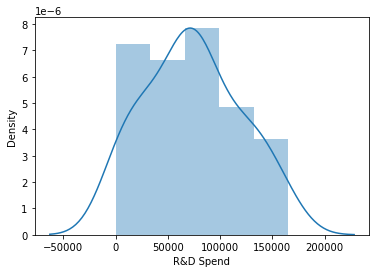

In [8]:
sns.distplot(df["R&D Spend"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

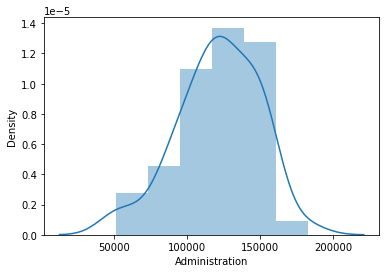

In [9]:
sns.distplot(df["Administration"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

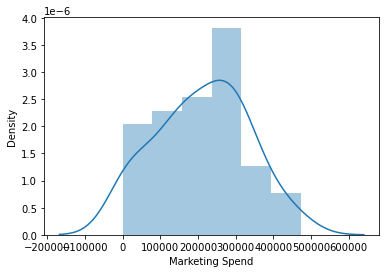

In [10]:
sns.distplot(df["Marketing Spend"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='State', ylabel='Density'>

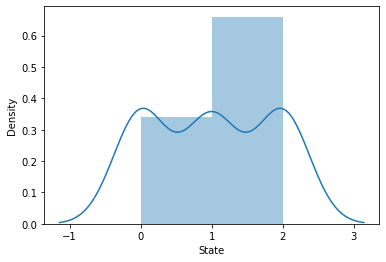

In [11]:
sns.distplot(df["State"])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

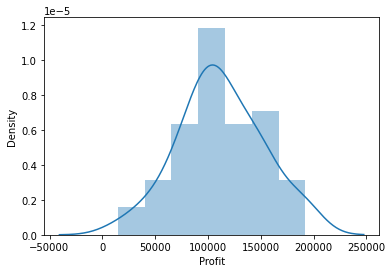

In [12]:
sns.distplot(df["Profit"])

In [13]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [14]:
data= df.rename({"R&D Spend":"RDS","Administration":"ADMS","Marketing Spend":"MKTS"},axis=1)
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [15]:
model= smf.ols("Profit~RDS+ADMS+MKTS+State",data=data).fit()

In [16]:
model.params

Intercept    50142.506443
RDS              0.805760
ADMS            -0.026826
MKTS             0.027228
State          -22.320577
dtype: float64

In [17]:
model.tvalues

Intercept     7.368962
RDS          17.608621
ADMS         -0.519906
MKTS          1.636966
State        -0.013865
dtype: float64

In [18]:
model.pvalues

Intercept    2.900008e-09
RDS          8.249206e-22
ADMS         6.056771e-01
MKTS         1.086131e-01
State        9.889988e-01
dtype: float64

In [19]:
model.rsquared

0.9507462044842656

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           8.51e-29
Time:                        13:32:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RDS            0.8058      0.046     17.609      0.000       0.714       0.898
ADMS          -0.0268      0.052     -0.520      0.606      -0.131       0.077
MKTS           0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Build linear model with variables whose P-value is greater than 0.05

In [22]:
model_a= smf.ols("Profit~ADMS",data=data).fit()
np.round(model_a.pvalues,4)

Intercept    0.0038
ADMS         0.1622
dtype: float64

In [23]:
model_a.rsquared

0.04028714077757245

<AxesSubplot:xlabel='ADMS', ylabel='Profit'>

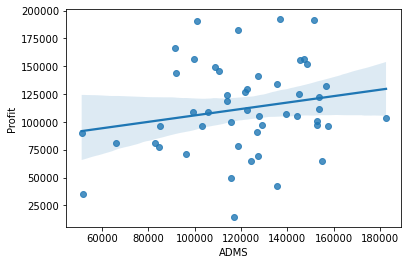

In [24]:
sns.regplot(x='ADMS',y='Profit',data=data)

In [25]:
model_m = smf.ols("Profit~MKTS",data=data).fit()
np.round(model_m.pvalues,4)

Intercept    0.0
MKTS         0.0
dtype: float64

In [26]:
model_m.rsquared

0.5591535746115515

<AxesSubplot:xlabel='MKTS', ylabel='Profit'>

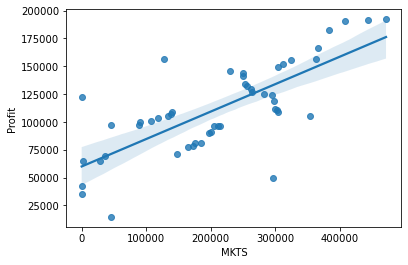

In [27]:
sns.regplot(x='MKTS',y='Profit',data=data)

In [28]:
model_c = smf.ols("Profit~State",data=data).fit()
np.round(model_c.pvalues,4)

Intercept    0.0000
State        0.4818
dtype: float64

In [29]:
model_c.rsquared

0.010362489571402289

# Model Validation ~ Calculating VIF

In [41]:
rsq_r = smf.ols("ADMS~RDS+MKTS+State",data=data).fit().rsquared
vif_a = 1/(1-rsq_r)
vif_a

1.1753153231430187

In [42]:
rsq_r = smf.ols("MKTS~RDS+ADMS+State",data=data).fit().rsquared
vif_m = 1/(1-rsq_r)
vif_m

2.326780136936846

In [43]:
rsq_r = smf.ols("State~RDS+ADMS+MKTS",data=data).fit().rsquared
vif_c = 1/(1-rsq_r)
vif_c

1.0112807816962477

In [44]:
rsq_r = smf.ols("RDS~ADMS+MKTS+State",data=data).fit().rsquared
vif_r = 1/(1-rsq_r)
vif_r

2.48117810664151

In [45]:
D = pd.DataFrame({"Variables":["RDS","ADMS","MKTS","State"],"VIF":[vif_r,vif_a,vif_m,vif_c]})
D

,Variables,VIF
0,RDS,2.481178
1,ADMS,1.175315
2,MKTS,2.326780
3,State,1.011281


In [46]:
model.resid

0      -240.934416
1      2609.393955
2      8899.431581
3      9224.499382
4     -5954.860630
5     -6570.087958
6     -2016.402125
7     -4271.004155
8       490.611791
9     -5149.346740
10    10611.576482
11     8661.886997
12    12446.641369
13     6796.378735
14   -16947.693104
15   -16297.587589
16    10055.036102
17    -4800.428034
18    -4748.168968
19     7163.632009
20     1811.887956
21    -5983.963770
22    -4354.693173
23    -1262.466061
24    -4788.999732
25     5144.849591
26    -4866.912270
27    -9377.248176
28     1623.265402
29     -767.388601
30      485.636602
31     -181.152734
32    -1595.336763
33    -1135.453688
34     7652.782939
35     5991.106571
36    15424.078702
37      307.906968
38    11555.779367
39    -2744.396769
40     3403.599361
41     2997.938430
42      857.718955
43     9616.848808
44      569.213149
45    17300.941187
46    -6672.246236
47    -3949.833956
48   -13473.163247
49   -33552.873495
dtype: float64

Text(0.5, 1.0, 'QQ plot of residuals')

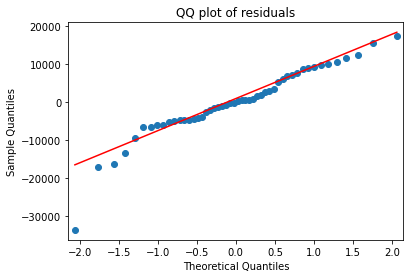

In [47]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title("QQ plot of residuals")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

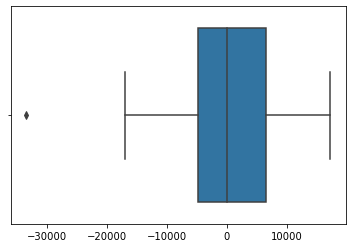

In [48]:
sns.boxplot(model.resid)

# Residual Plot for Homoscedasticity

In [49]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual values')

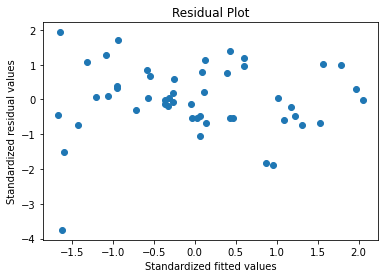

In [50]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")

# Model Delegation Diagnostics

In [51]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

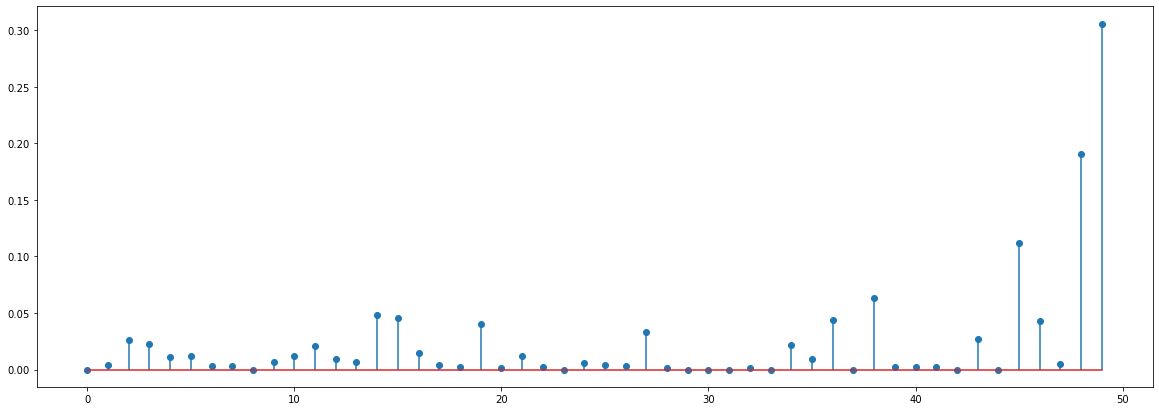

In [52]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.show()

In [53]:
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

In [54]:
data[data.index.isin([48,49])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


In [55]:
data1 = data.drop(data.index[[48,49]],axis=0)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [56]:
model2 = smf.ols("Profit~RDS+ADMS+MKTS+State",data=data1).fit()

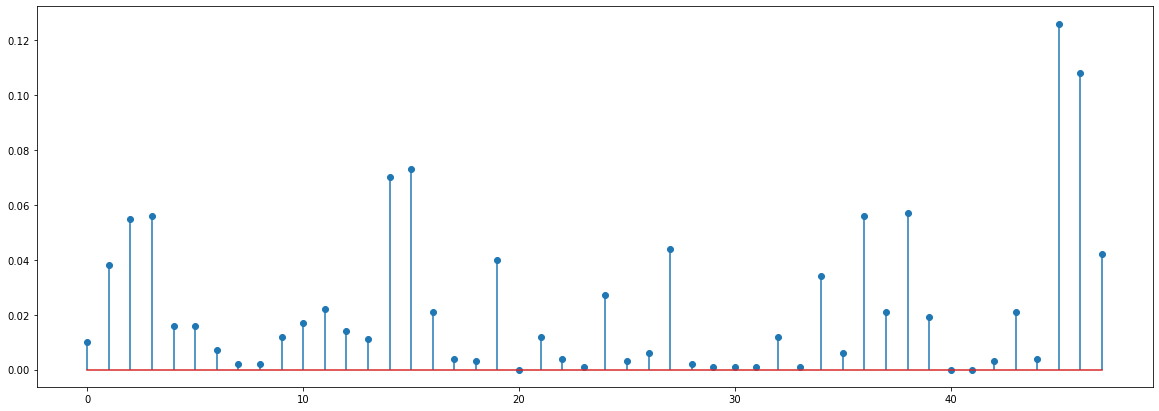

In [57]:
model_influence2 = model2.get_influence()
(c_2, _) = model_influence2.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_2,3))
plt.show()

In [58]:
(np.argmax(c_2),np.max(c_2))

(45, 0.12563158428957868)

In [59]:
data2 = data1.drop(data1.index[[45,46]],axis=0).reset_index()
data2

,index,RDS,ADMS,MKTS,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94
5,5,131876.90,99814.71,362861.36,2,156991.12
6,6,134615.46,147198.87,127716.82,0,156122.51
7,7,130298.13,145530.06,323876.68,1,155752.60
8,8,120542.52,148718.95,311613.29,2,152211.77
9,9,123334.88,108679.17,304981.62,0,149759.96


In [60]:
data2 = data2.drop(['index'],axis=1)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


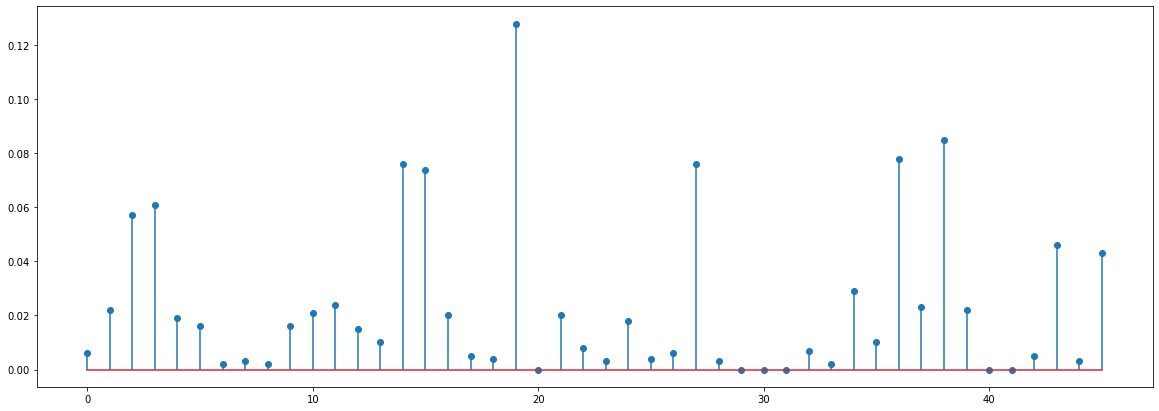

In [61]:
model3 = smf.ols("Profit~RDS+ADMS+MKTS+State",data=data2).fit()
model_influence3 = model3.get_influence()
(c_3, _) = model_influence3.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_3,3))
plt.show()

In [62]:
(np.argmax(c_3),np.max(c_3))

(19, 0.12806670927880898)

In [63]:
data3 = data2.drop(data2.index[[19]],axis=0).reset_index()
data3

,index,RDS,ADMS,MKTS,State,Profit
0,0,165349.20,136897.80,471784.10,2,192261.83
1,1,162597.70,151377.59,443898.53,0,191792.06
2,2,153441.51,101145.55,407934.54,1,191050.39
3,3,144372.41,118671.85,383199.62,2,182901.99
4,4,142107.34,91391.77,366168.42,1,166187.94
5,5,131876.90,99814.71,362861.36,2,156991.12
6,6,134615.46,147198.87,127716.82,0,156122.51
7,7,130298.13,145530.06,323876.68,1,155752.60
8,8,120542.52,148718.95,311613.29,2,152211.77
9,9,123334.88,108679.17,304981.62,0,149759.96


In [64]:
data3 = data3.drop(['index'],axis=1)
data3

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


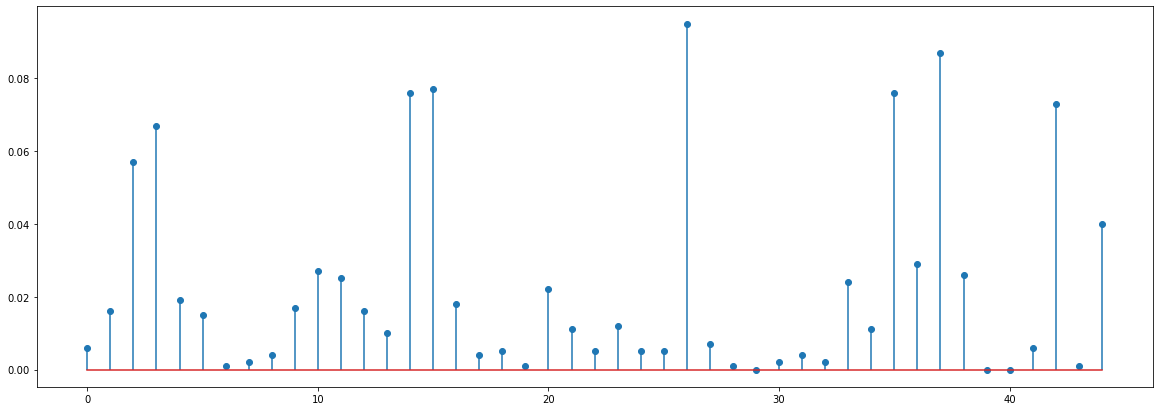

In [65]:
model4 = smf.ols("Profit~RDS+ADMS+MKTS+State",data=data3).fit()
model_influence4 = model4.get_influence()
(c_4, _) = model_influence4.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_4,3))
plt.show()

In [66]:
(np.argmax(c_4),np.max(c_4))

(26, 0.09528571574440976)

In [68]:
model_final = smf.ols("Profit~RDS+ADMS+MKTS+State",data=data3).fit()
(model_final.rsquared,model_final.aic)

(0.9646803740985611, 929.9726283205329)

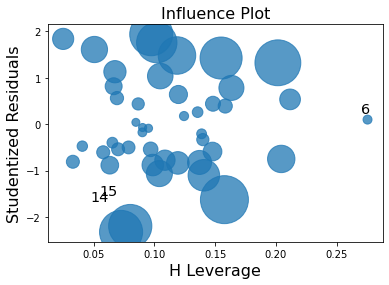

In [69]:
influence_plot(model_final)
plt.show()

In [70]:
model_final.resid

0      2556.523352
1      3375.206411
2      9662.946327
3     11460.434439
4     -5557.879747
5     -5203.936674
6       594.761283
7     -2759.659036
8      2968.746916
9     -5924.185297
10    10852.407244
11     6912.546201
12    12442.986797
13     5593.581736
14   -14990.462926
15   -14208.866640
16     7679.180062
17    -3432.909379
18    -5652.588851
19    -1203.978853
20    -5436.028433
21    -6063.641411
22    -3720.339838
23    -3884.179290
24     3855.624688
25    -4191.961147
26   -10334.484180
27     2893.643756
28     1166.946671
29      263.225969
30     1717.456448
31    -2207.464456
32    -3312.217963
33     5067.389763
34     4264.031614
35    12570.320239
36    -4749.451565
37     8266.287504
38    -7106.122367
39     -605.822089
40     -496.839468
41    -3674.783936
42     9130.007682
43    -1380.608088
44    -7195.843461
dtype: float64

In [71]:
model_final.fittedvalues

0     189705.306648
1     188416.853589
2     181387.443673
3     171441.555561
4     171745.819747
5     162195.056674
6     155527.748717
7     158512.259036
8     149243.023084
9     155684.145297
10    135269.542756
11    137346.853799
12    129142.533203
13    128713.768264
14    147593.112926
15    144125.906640
16    119313.749938
17    128803.279379
18    129919.488851
19    119678.008853
20    116749.048433
21    116415.891411
22    112454.329838
23    112436.219290
24    103548.715312
25    109925.501147
26    115342.794180
27    100388.736244
28     99837.693329
29     99674.364031
30     95766.103552
31     99635.304456
32    100091.137963
33     91645.410237
34     92215.478386
35     78137.869761
36     94698.591565
37     72962.772496
38     88111.882367
39     78845.732089
40     78295.669468
41     75173.273936
42     60628.972318
43     66580.938088
44     49755.573461
dtype: float64

In [72]:
data3["Predicted"]=model_final.fittedvalues
data3["Errors"]=model_final.resid
data3

,RDS,ADMS,MKTS,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,2,192261.83,189705.306648,2556.523352
1,162597.70,151377.59,443898.53,0,191792.06,188416.853589,3375.206411
2,153441.51,101145.55,407934.54,1,191050.39,181387.443673,9662.946327
3,144372.41,118671.85,383199.62,2,182901.99,171441.555561,11460.434439
4,142107.34,91391.77,366168.42,1,166187.94,171745.819747,-5557.879747
5,131876.90,99814.71,362861.36,2,156991.12,162195.056674,-5203.936674
6,134615.46,147198.87,127716.82,0,156122.51,155527.748717,594.761283
7,130298.13,145530.06,323876.68,1,155752.60,158512.259036,-2759.659036
8,120542.52,148718.95,311613.29,2,152211.77,149243.023084,2968.746916
9,123334.88,108679.17,304981.62,0,149759.96,155684.145297,-5924.185297
